In [12]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

In [13]:
import yaml 

import matplotlib.pyplot as plt
import seaborn as sns

from utils.statistics_dataset import load_coco, count_instances_per_category, bbox_size_distribution, count_images_per_category

with open('../configs.yaml', 'r', encoding='utf-8') as f:
    cf = yaml.safe_load(f)

In [14]:
# path raw image and anns
train2017 = cf['data']['raw_images']['train']
train2017_anns = cf['data']['raw_annotations']['train']

# path image and anns for 10 classes
train2017_10cls = cf['data']['images']['train']
train2017_anns_10cls = cf['data']['annotations']['train']

In [15]:
def bar_plot(df, x, y, title=None):
    """
    Vẽ bar plot ngang kèm data labels.
    
    Parameters:
        df (pd.DataFrame): dataframe chứa dữ liệu
        x (str): cột số liệu (ví dụ: num_instances)
        y (str): cột category (ví dụ: category)
        title (str, optional): tiêu đề biểu đồ
    """
    plt.figure(figsize=(8, len(df) * 0.35))

    ax = sns.barplot(
        data=df,
        x=x,
        y=y,
        orient="h"
    )

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3) # type: ignore

    if title:
        ax.set_title(title)

    ax.set_xlabel(x)
    ax.set_ylabel(y)

    plt.tight_layout()
    plt.show()


---

# 1. Full dataset

In [16]:
coco = load_coco(train2017_anns)

loading annotations into memory...
Done (t=121.23s)
creating index...
index created!


In [17]:
full_df_ann = count_instances_per_category(coco)
full_df_image = count_images_per_category(coco)
full_df_bbox_size = bbox_size_distribution(coco)

## 1.1. Phân phối số lượng bounding boxes theo từng category (COCO 2017)

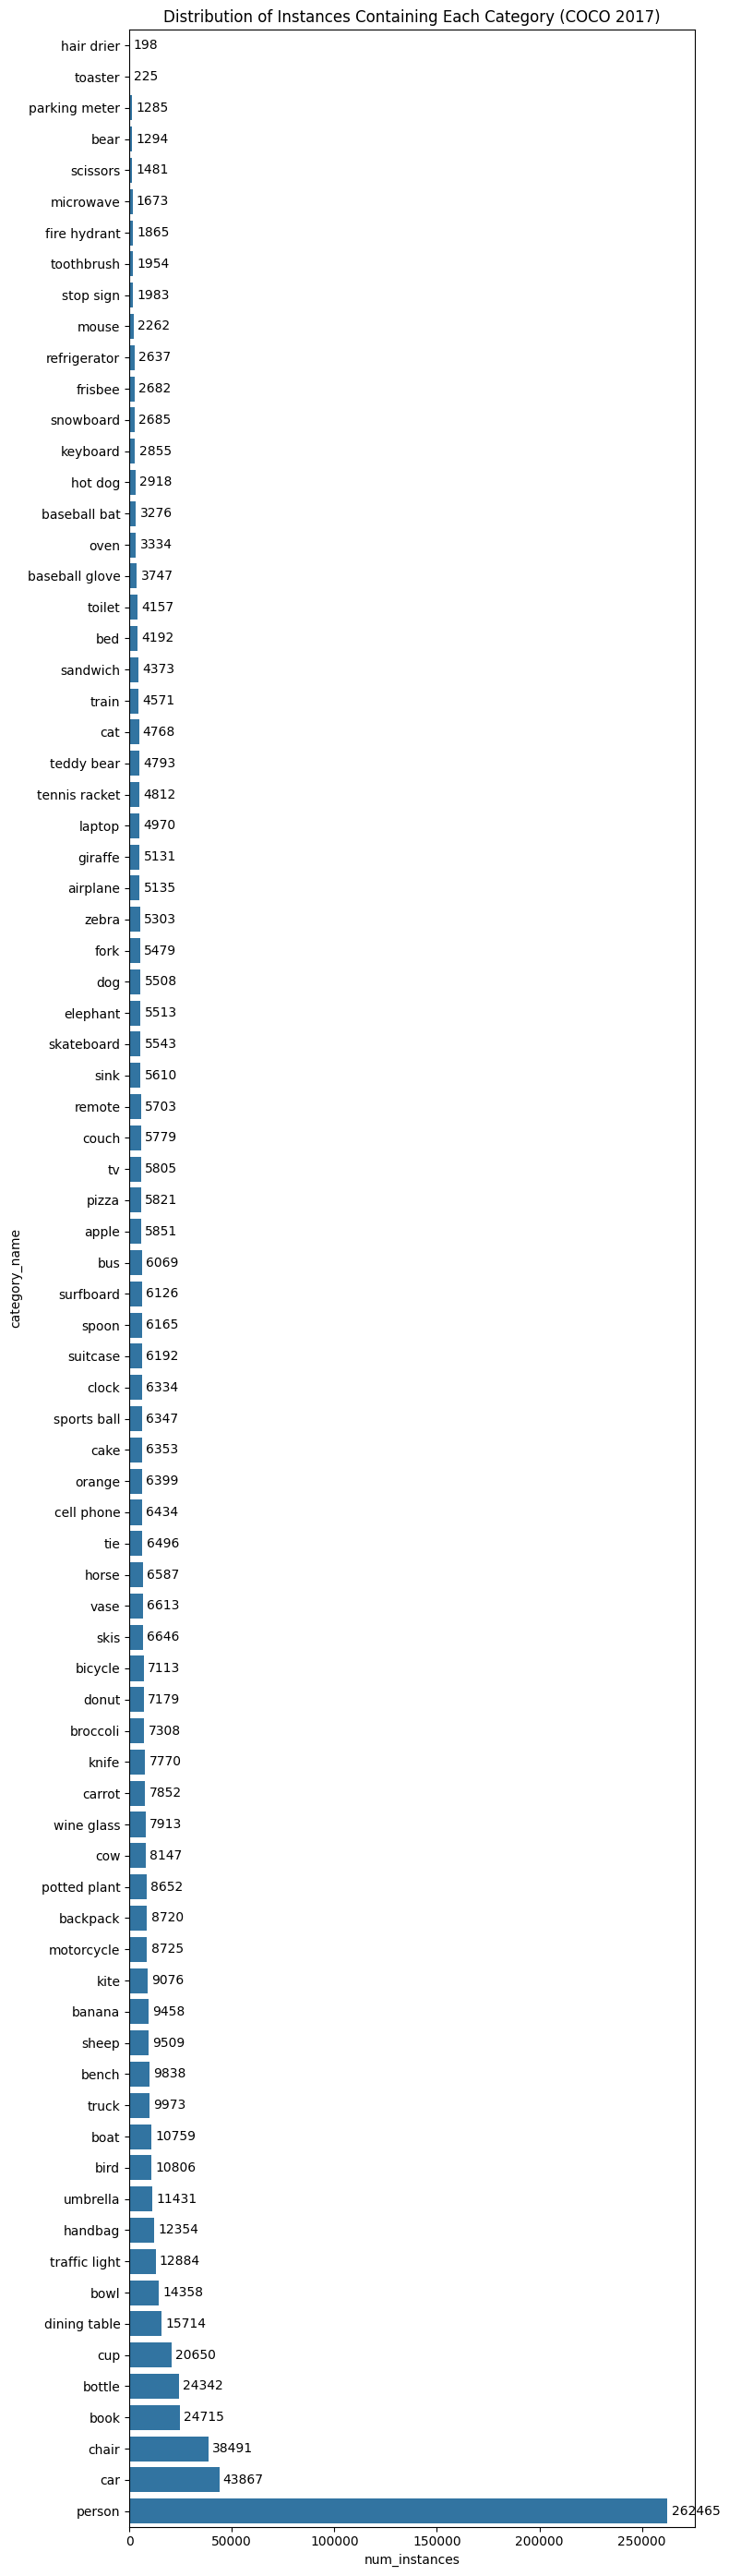

In [18]:
bar_plot(full_df_ann, y='category_name', x='num_instances', title='Distribution of Instances Containing Each Category (COCO 2017)')

## 1.2. Phân phối số lượng images theo từng category (COCO 2017)

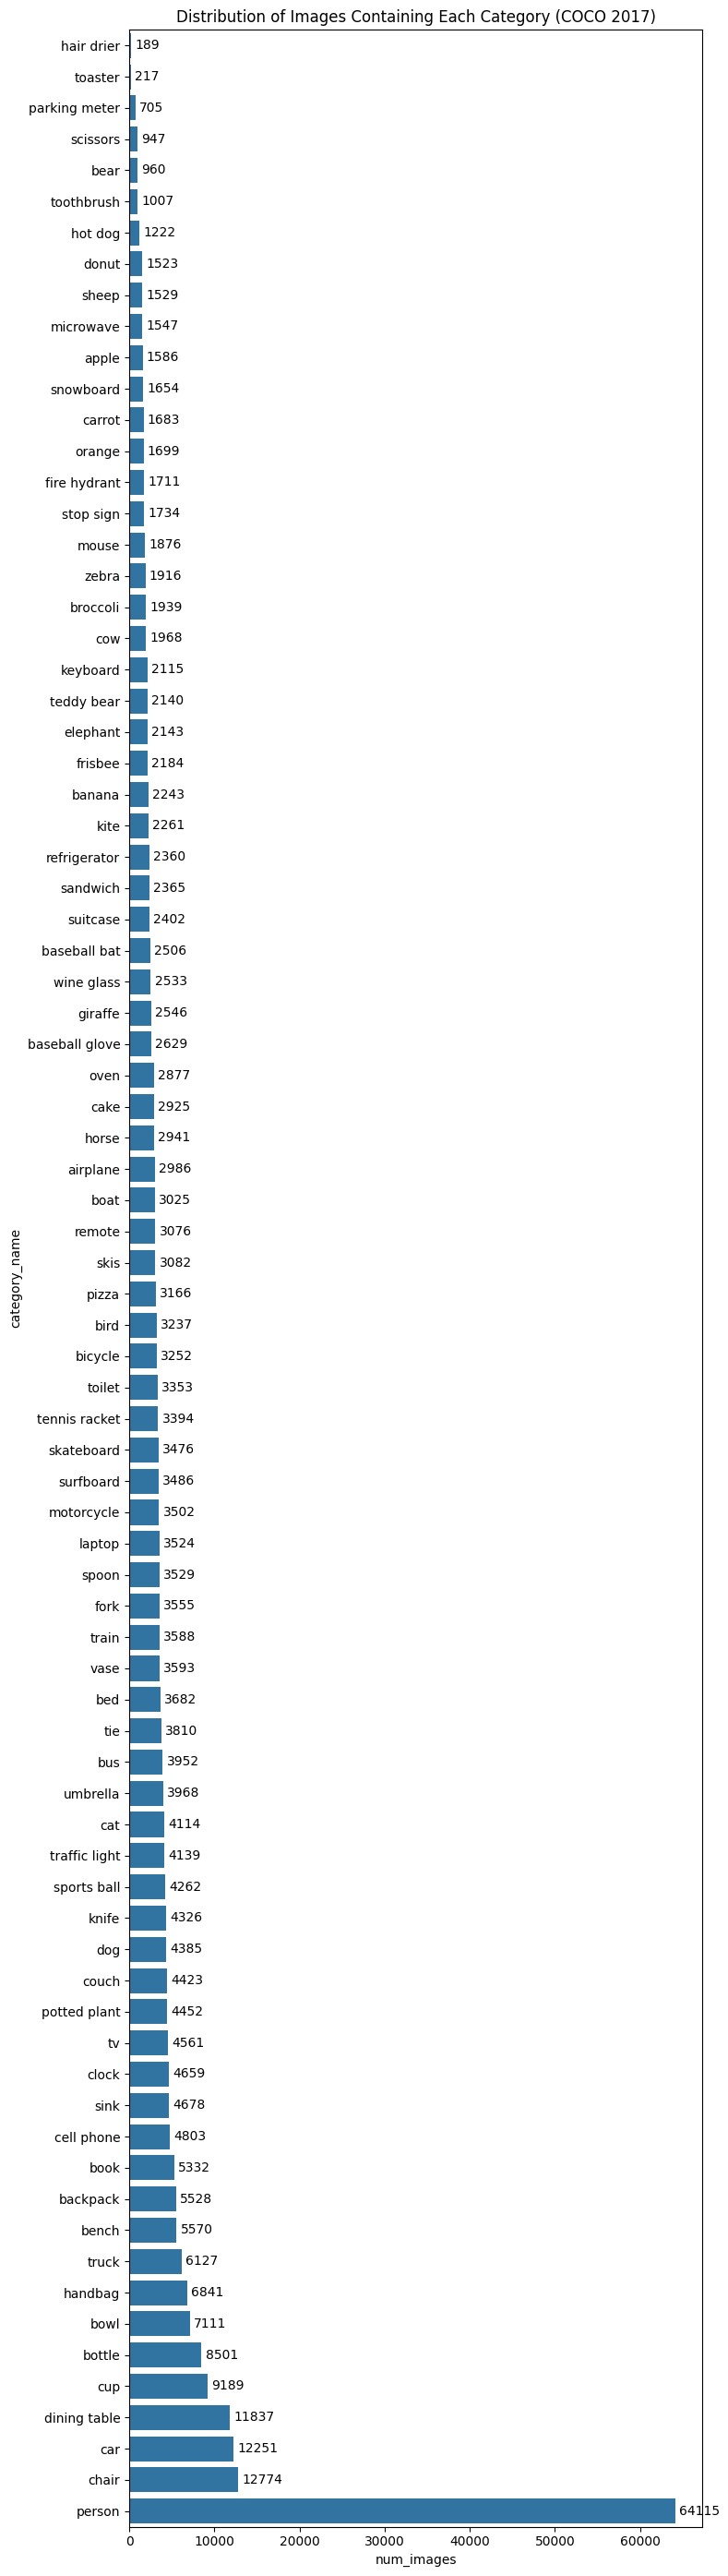

In [19]:
bar_plot(full_df_image, y='category_name', x='num_images', title='Distribution of Images Containing Each Category (COCO 2017)')

## 1.3. Thống kê kích thước Bbox: nhỏ – trung bình – lớn trong COCO 2017

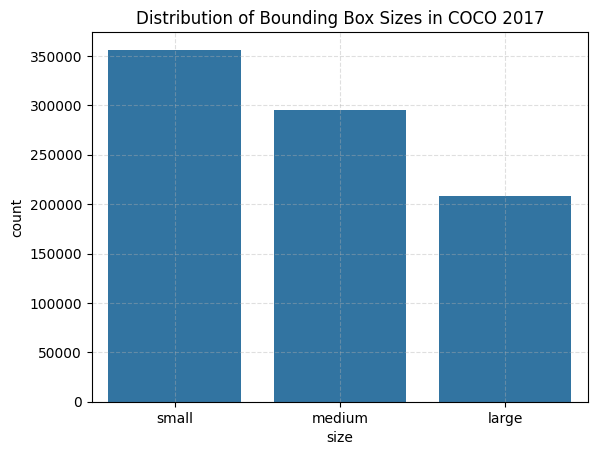

In [20]:
sns.barplot(full_df_bbox_size, x='size', y='count')
plt.title('Distribution of Bounding Box Sizes in COCO 2017')
plt.grid(linestyle='--', alpha=0.4)

---

# 2. Split dataset (10 classes)

In [21]:
selected_ids = [5, 6, 7, 17, 18, 22, 24, 25, 63, 65]

coco_10cls = load_coco(train2017_anns_10cls) # load anns 10 classes

loading annotations into memory...
Done (t=1.56s)
creating index...
index created!


In [22]:
anns = coco_10cls.loadCats(selected_ids)
anns

[{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},
 {'supercategory': 'animal', 'id': 22, 'name': 'elephant'},
 {'supercategory': 'animal', 'id': 24, 'name': 'zebra'},
 {'supercategory': 'animal', 'id': 25, 'name': 'giraffe'},
 {'supercategory': 'furniture', 'id': 63, 'name': 'couch'},
 {'supercategory': 'furniture', 'id': 65, 'name': 'bed'}]

In [23]:
df_instances_10cls = count_instances_per_category(coco_10cls)
df_image_10cls = count_images_per_category(coco_10cls)
df_size_10cls = bbox_size_distribution(coco_10cls)

## 2.1. Phân phối số lượng instances theo từng category (10 classes)

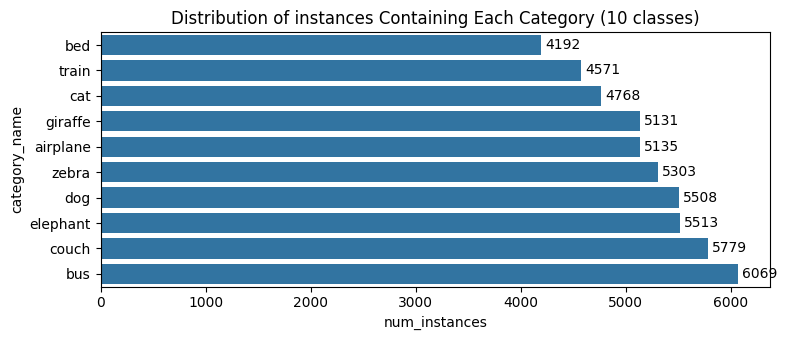

In [24]:
bar_plot(df_instances_10cls, x='num_instances', y='category_name', title='Distribution of instances Containing Each Category (10 classes)')

## 2.2. Phân phối số lượng image theo từng category (10 classes)

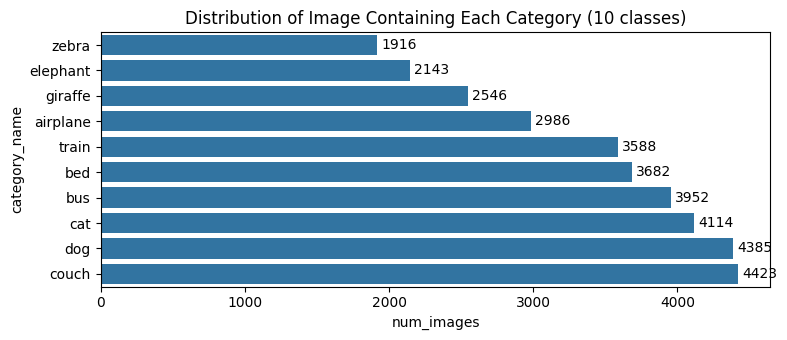

In [25]:
bar_plot(df_image_10cls, x='num_images', y='category_name', title='Distribution of Image Containing Each Category (10 classes)')

## 2.3. Thống kê kích thước Bbox: nhỏ – trung bình – lớn trong COCO 2017 (10 classes)

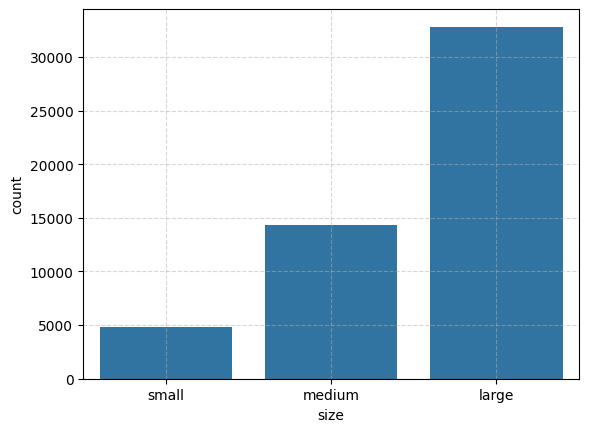

In [26]:
sns.barplot(df_size_10cls, x='size', y='count')
plt.grid(linestyle='--', alpha=0.5)